<a href="https://colab.research.google.com/github/BrandonKaza32/Assignment-1-JPNB/blob/main/Waffle_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

import numpy as np
import pandas as pd
from PIL import Image # conerting images into arrays

import seaborn as sns

import wordcloud

print('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)
print('Wordcloud version: ', wordcloud.__version__)

Matplotlib version:  3.10.0
Seaborn version:  0.13.2
Wordcloud version:  1.9.4


#Fetching Data

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
print(df_can.shape)

(195, 39)


In [5]:
df_can.set_index('Country', inplace=True)

#Waffle Charts

In [6]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Step 1 of creating a waffle chart:

In [7]:
#Compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

#print out the proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


Step 2 (Defining the overall size of the waffle chart):

In [8]:
width = 40
height = 10

total_num_tiles = width * height

print(f"Total number of tiles is {total_num_tiles}.")

Total number of tiles is 400.


Step 3 (Using the proportion of each category to determine it respective number of tiles) :

In [9]:
#Compute the number of ties for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

#print out the number of tiles per category
pd.DataFrame({'Number of tiles': tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


Step 4 (Creating a matrix that resembles the waffle chart and populating it).

In [10]:
#initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

         #if the number of tiles populated for the current category is equal to its corresponding allocated tiles..
        if tile_index > sum(tiles_per_category[0:category_index]):
            # .. proceed to the next category
           category_index += 1

           # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')


Waffle chart populated!


In [11]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Step 5 (Map the waffle chart matrix into a visual) :

In [12]:
# ... (other code above) ...

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # ... (rest of your code to assign values) ...

        # Add print statement to see current value:
        print(f"Row: {row}, Col: {col}, Value: {waffle_chart[row, col]}")

# ... (rest of your code below) ...

Row: 0, Col: 0, Value: 1
Row: 1, Col: 0, Value: 1
Row: 2, Col: 0, Value: 1
Row: 3, Col: 0, Value: 1
Row: 4, Col: 0, Value: 1
Row: 5, Col: 0, Value: 1
Row: 6, Col: 0, Value: 1
Row: 7, Col: 0, Value: 1
Row: 8, Col: 0, Value: 1
Row: 9, Col: 0, Value: 1
Row: 0, Col: 1, Value: 1
Row: 1, Col: 1, Value: 1
Row: 2, Col: 1, Value: 1
Row: 3, Col: 1, Value: 1
Row: 4, Col: 1, Value: 1
Row: 5, Col: 1, Value: 1
Row: 6, Col: 1, Value: 1
Row: 7, Col: 1, Value: 1
Row: 8, Col: 1, Value: 1
Row: 9, Col: 1, Value: 1
Row: 0, Col: 2, Value: 1
Row: 1, Col: 2, Value: 1
Row: 2, Col: 2, Value: 1
Row: 3, Col: 2, Value: 1
Row: 4, Col: 2, Value: 1
Row: 5, Col: 2, Value: 1
Row: 6, Col: 2, Value: 1
Row: 7, Col: 2, Value: 1
Row: 8, Col: 2, Value: 1
Row: 9, Col: 2, Value: 1
Row: 0, Col: 3, Value: 1
Row: 1, Col: 3, Value: 1
Row: 2, Col: 3, Value: 1
Row: 3, Col: 3, Value: 1
Row: 4, Col: 3, Value: 1
Row: 5, Col: 3, Value: 1
Row: 6, Col: 3, Value: 1
Row: 7, Col: 3, Value: 1
Row: 8, Col: 3, Value: 1
Row: 9, Col: 3, Value: 1


<Figure size 640x480 with 0 Axes>

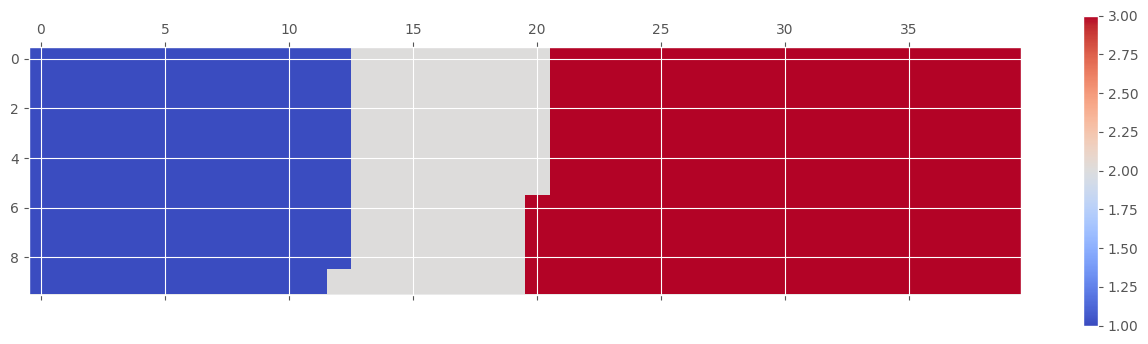

In [13]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

Step 6 (Prettify the chart) :

<Figure size 640x480 with 0 Axes>

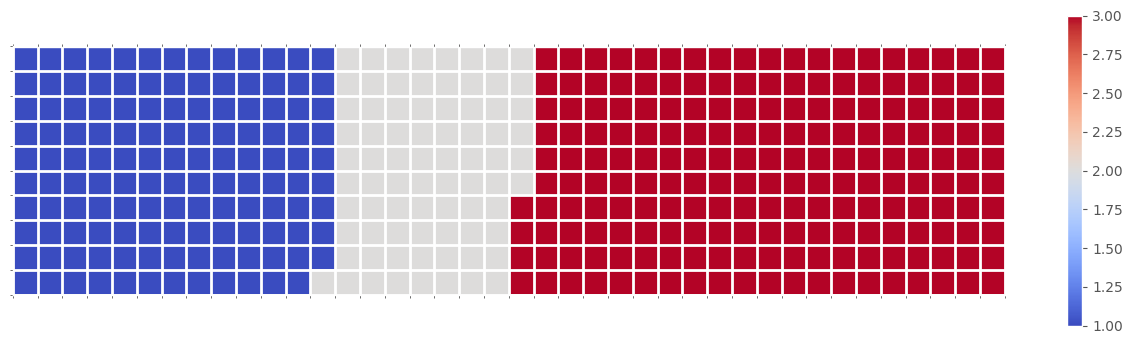

In [14]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#Add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

Step 7 (Create a legend)

<ipython-input-15-bb9780f5f930>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
<ipython-input-15-bb9780f5f930>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
<ipython-input-15-bb9780f5f930>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i])/total_values)


<Figure size 640x480 with 0 Axes>

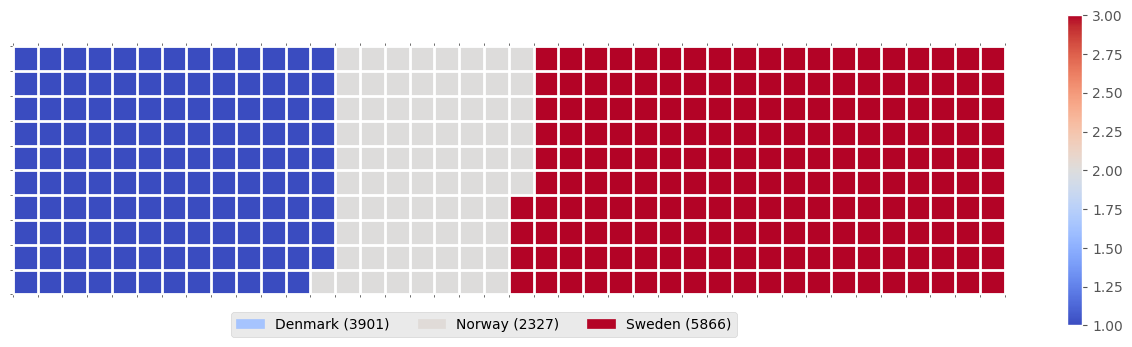

In [15]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#Compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

In [16]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

   # compute the proportion of each category with respect to the total
   total_values = sum(values)
   category_proportions = [(float(value) / total_values) for value in values]

   # compute the total number of tiles
   total_num_tiles = width * height # total number of tiles
   print('Total number of tiles is', total_num_tiles)

   # compute the number of tiles for each category
   tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

   # print out number of tiles per category
   for i, tiles in enumerate(tiles_per_category):
       print(df_dsn.index.values[i] + ': ' + str(tiles))

   # initialize the waffle chart as an empty matrix
   waffle_chart = np.zeros((height, width))

   # define indices to loop through waffle chart
   category_index = 0
   tile_index = 0

   # populate the waffle chart
   for col in range(width):
       for row in range(height):
           tile_index += 1

           # if the number of tiles populated for the current category
           # is equal to its corresponding allocated tiles..
           if tile_index > sum(tiles_per_category[0: category_index]):
              # ..proceed to the next category
              category_index += 1
           # set the class value to an integer, which increases with class
           waffle_chart[row, col] = category_index

   # instantiate a new figure object
   fig = plt.figure()

   # use matshow to display the waffle chart
   colormap = plt.cm.coolwarm
   plt.matshow(waffle_chart, cmap=colormap)
   plt.colorbar()

   # get the axis
   ax = plt.gca()

   # set minor axis
   ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
   ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

   # add gridlines based on minor ticks
   ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

   plt.xticks([])
   plt.yticks([])

   # compute cumulative sum of individual categories to match color schemes between chart and legend
   values_cumsum = np.cumsum(values)
   total_values = values_cumsum[len(values_cumsum) - 1]

   # create legend
   legend_handles = []
   for i, category in enumerate(categories):
       if value_sign == '%':
           label_str = category + ' (' + str(values[i]) + value_sign + ')'
       else:
           label_str = category + ' (' + value_sign + str(values[i]) + ')'

       color_val = colormap(float(values_cumsum[i])/ total_values)
       legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

   # add legend to chart
   plt.legend(
       handles=legend_handles,
       loc='lower center',
       ncol=len(categories),
       bbox_to_anchor=(0., -0.2, 0.95, .1)
   )
   plt.show()

In [17]:
width = 40
height = 10

categories = df_dsn.index.values # categories
values = df_dsn['Total']  # corresponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<ipython-input-16-7e5ae88e2df2>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
<ipython-input-16-7e5ae88e2df2>:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
<ipython-input-16-7e5ae88e2df2>:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i])/ total_values)


<Figure size 640x480 with 0 Axes>

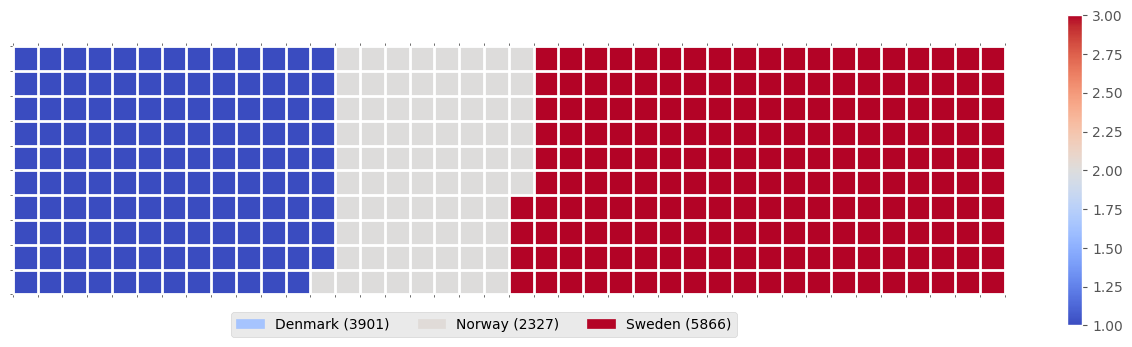

In [18]:
create_waffle_chart(categories, values, height, width, colormap)

In [19]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 19.1 MB/s eta 0:00:00


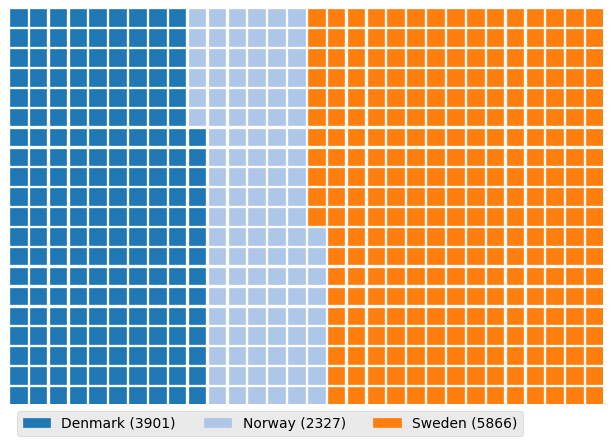

In [20]:
from pywaffle import Waffle

# Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30,
                 values = df_dsn['Total'], # pass the data to be used for display
                 cmap_name = 'tab20', # color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                           'loc': 'lower left', 'bbox_to_anchor':(0,-0.1), 'ncol': 3}
                 )

plt.show()


In [21]:
df_CI = df_can.loc[['India', 'China'], :]
df_CI

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


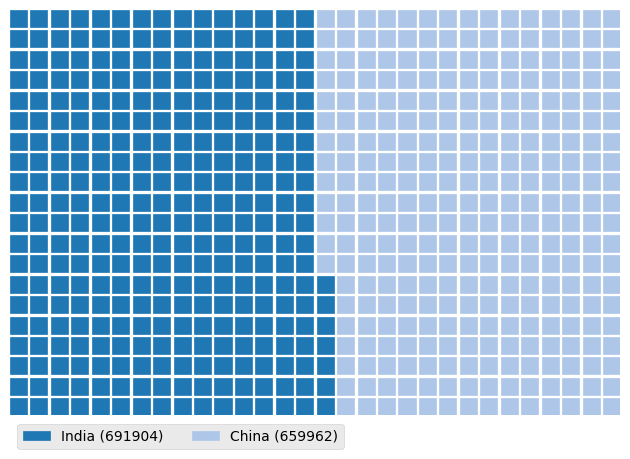

In [22]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30,
                 values = df_CI['Total'],
                 cmap_name = 'tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_CI.index.values,df_CI.Total)],
                           'loc': 'lower left', 'bbox_to_anchor': (0, -0.1), 'ncol':2}
                 )
plt.show()

#Word Cloud

In [23]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud imported!')

Wordcloud imported!


In [24]:
import urllib

## open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [25]:
stopwords = set(STOPWORDS)

In [26]:
alice_wc = WordCloud()

#generate the word cloud
alice_wc.generate(alice_novel)

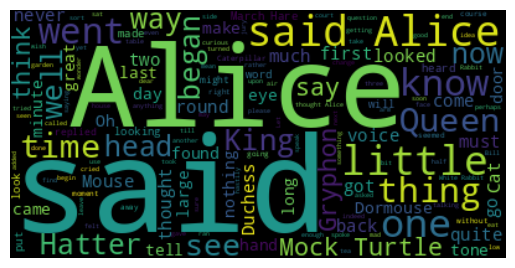

In [27]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

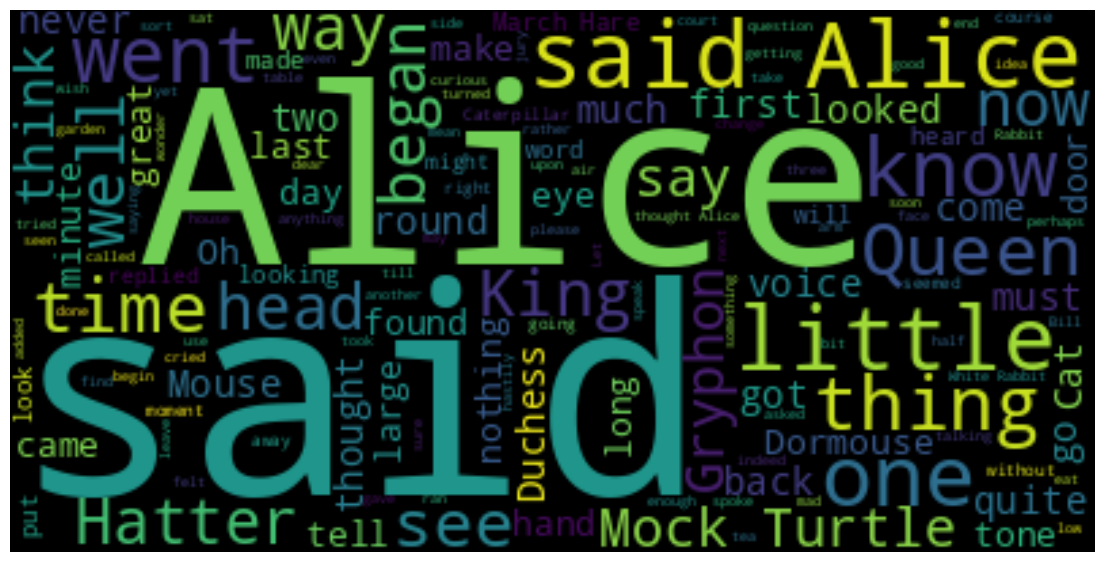

In [28]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

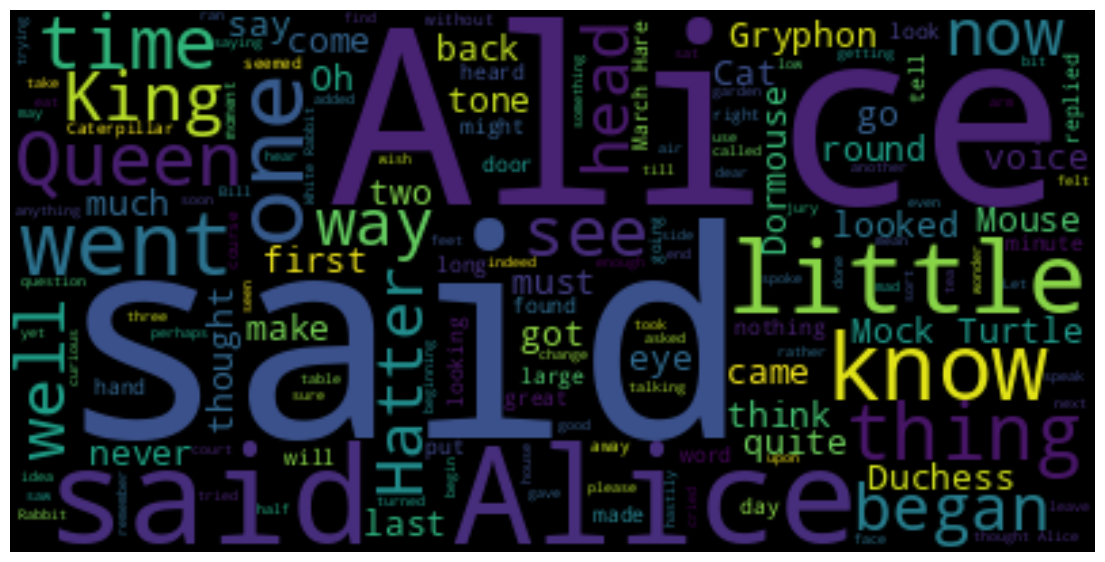

In [29]:
stopwords.add('said')

# regenerate the word cloud
alice_wc.generate(alice_novel)

fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

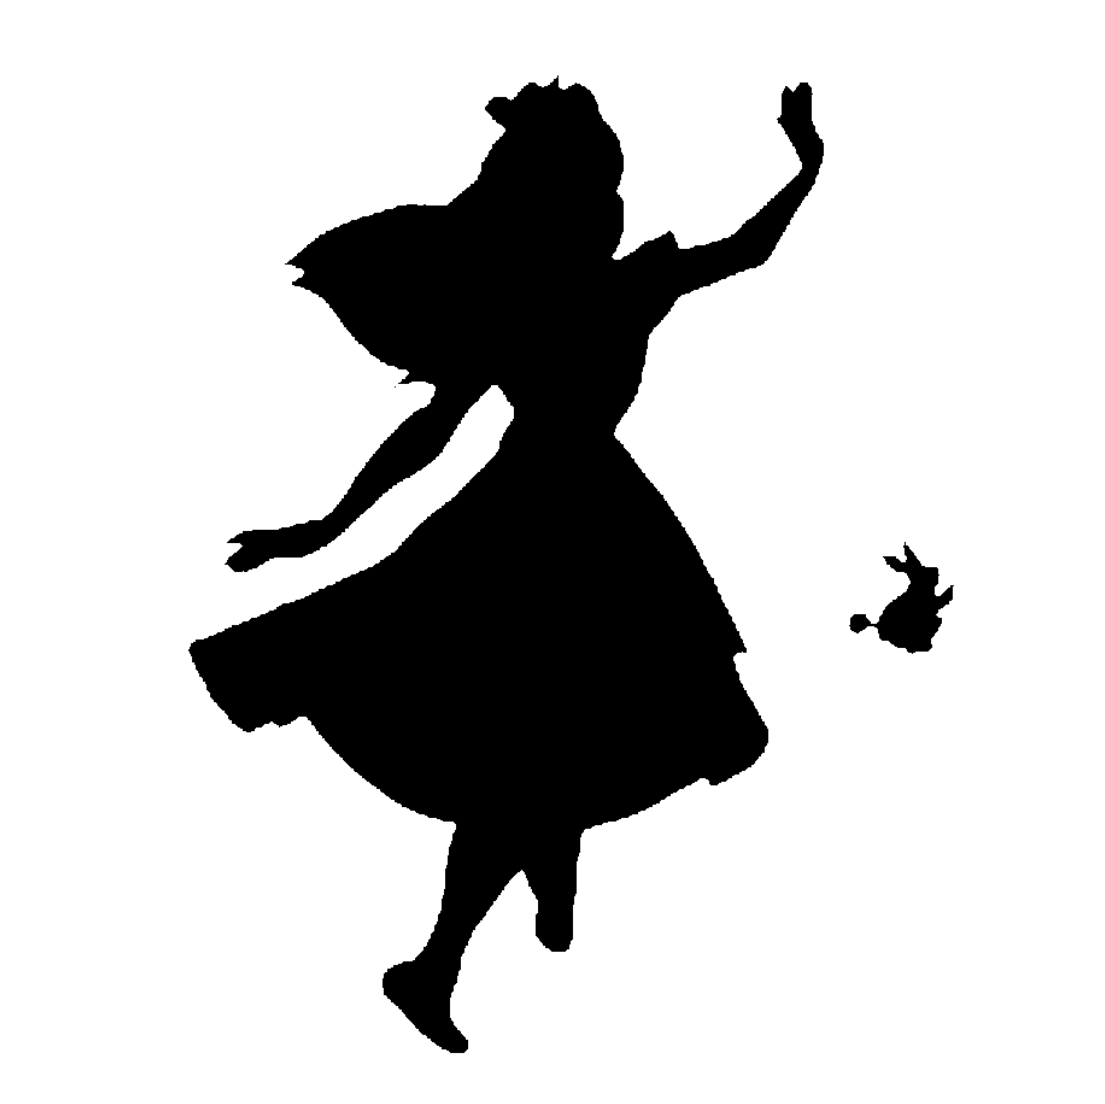

In [31]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

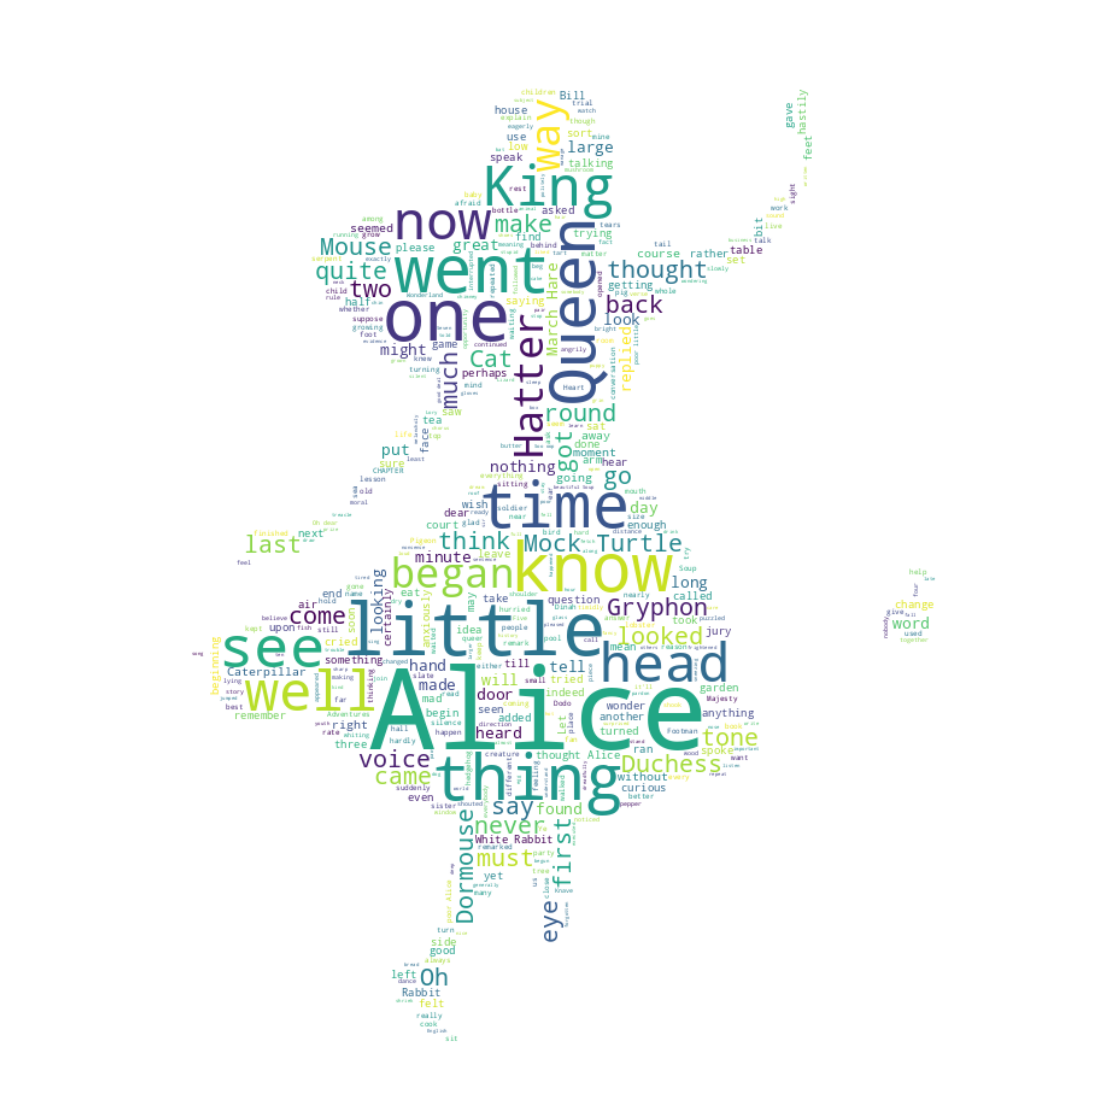

In [32]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask= alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [34]:
total_immigration = df_can['Total'].sum()
total_immigration

np.int64(6409153)

In [35]:
max_words = 90
word_string = ''
for country in df_can.index.values:
     # check if country's name is a single_word name
     if country.count(" ") == 0:
         repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
         word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [36]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


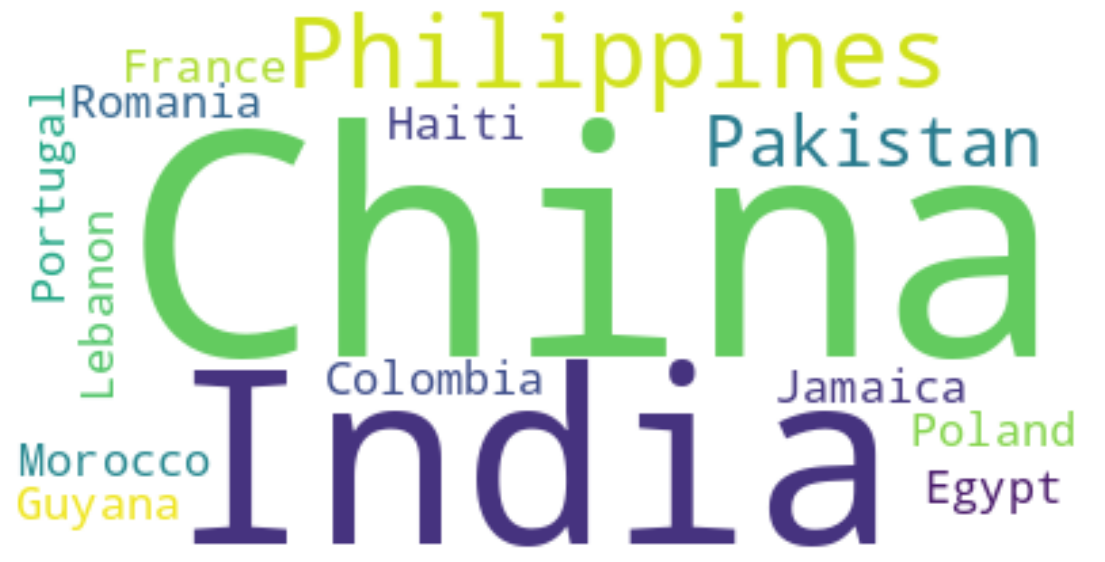

In [37]:
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Plotting with seaborn

Categorical Plots

In [38]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

countplot

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

<Axes: xlabel='Continent', ylabel='count'>

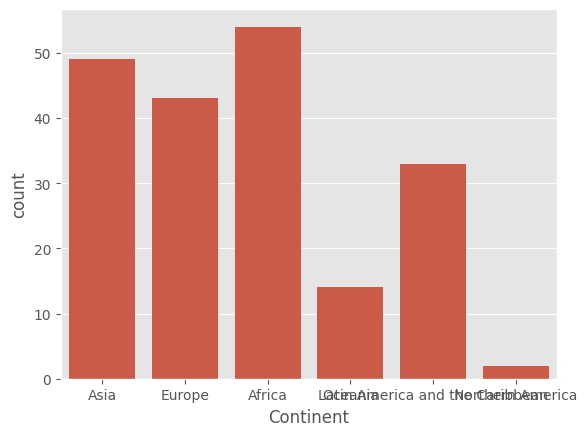

In [39]:
sns.countplot(x='Continent', data=df_can)

In [40]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northen America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

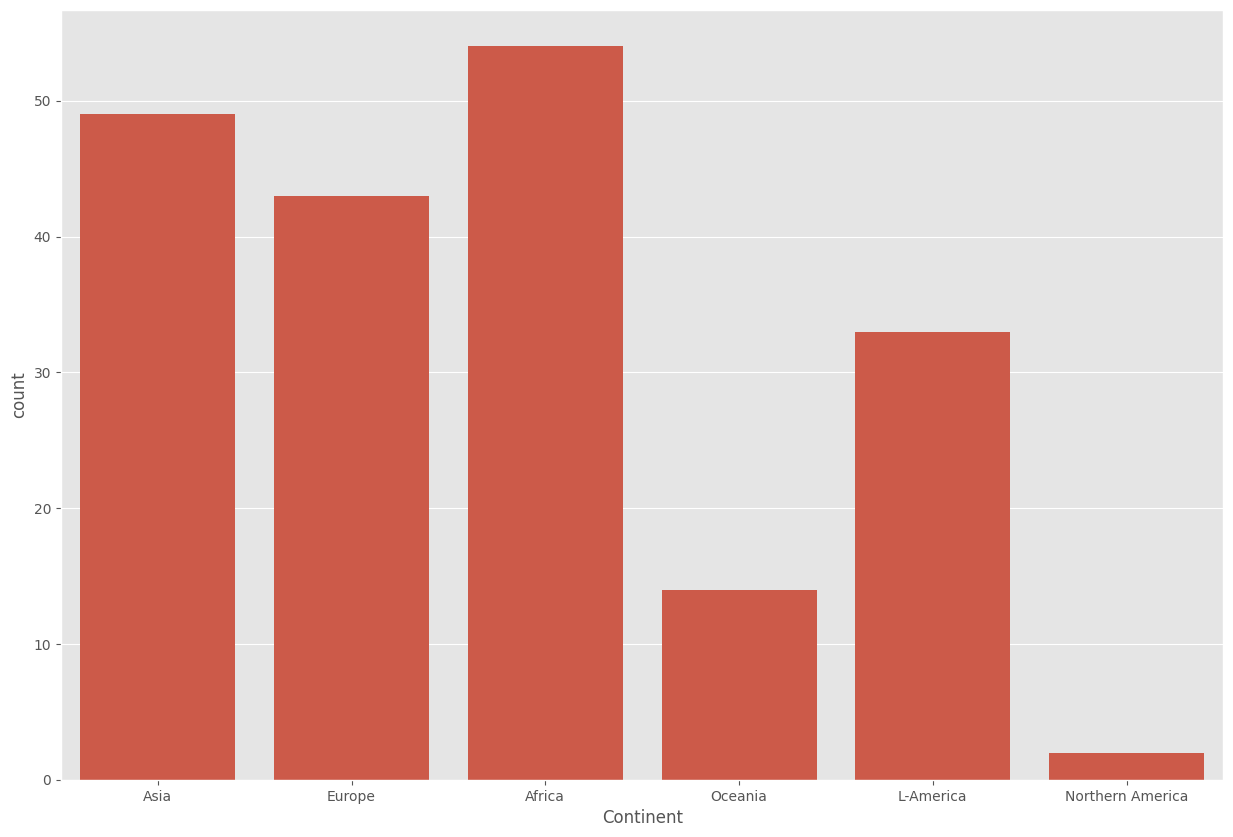

In [41]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

#Barplot

This plot will perform the Groupby on a categorical variable and plot agregated values, with confidence intervals.

<Axes: xlabel='Continent', ylabel='Total'>

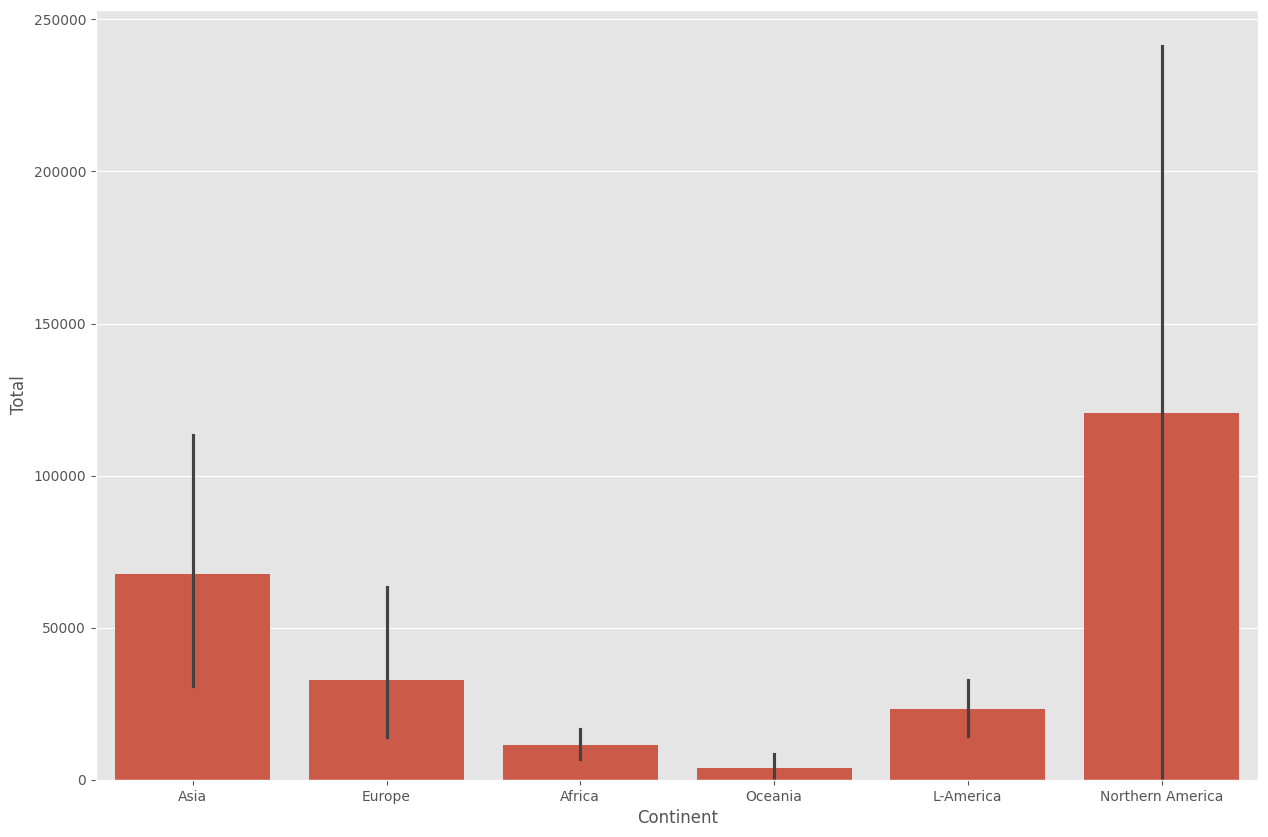

In [43]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)

You can verify the values by performing the groupby on the Total and Continent for mean()

In [44]:
df_Can2 = df_can1.groupby('Continent')['Total'].mean()
df_Can2

,Total
Continent,
Africa,11462.000000
Asia,67710.081633
Europe,32812.720930
L-America,23186.303030
Northern America,120571.000000
Oceania,3941.000000


#Regression Plot

In [45]:
years = list(map(str, range(1980, 2014)))
# Use sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Change the years to type float (useful for regresoin later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

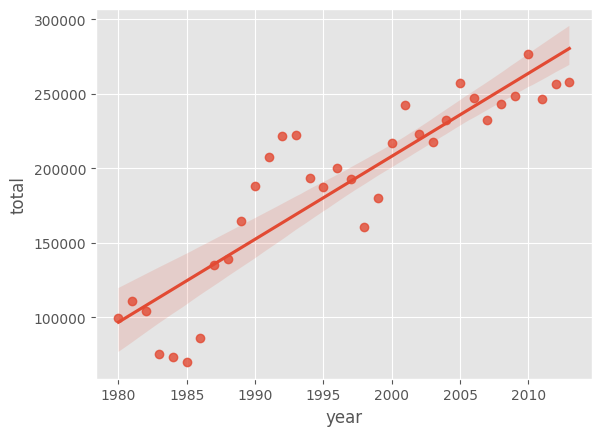

In [46]:
sns.regplot(x='year', y='total', data=df_tot)

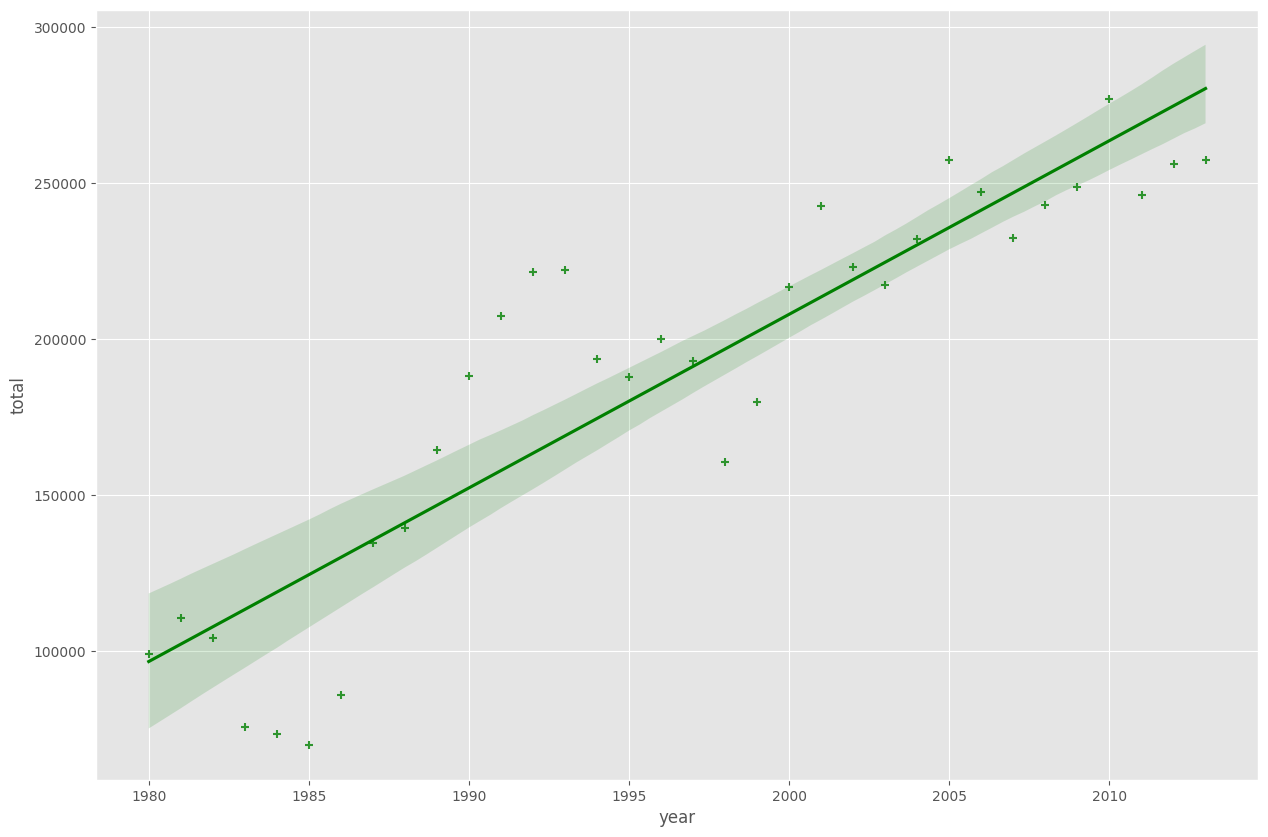

In [47]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

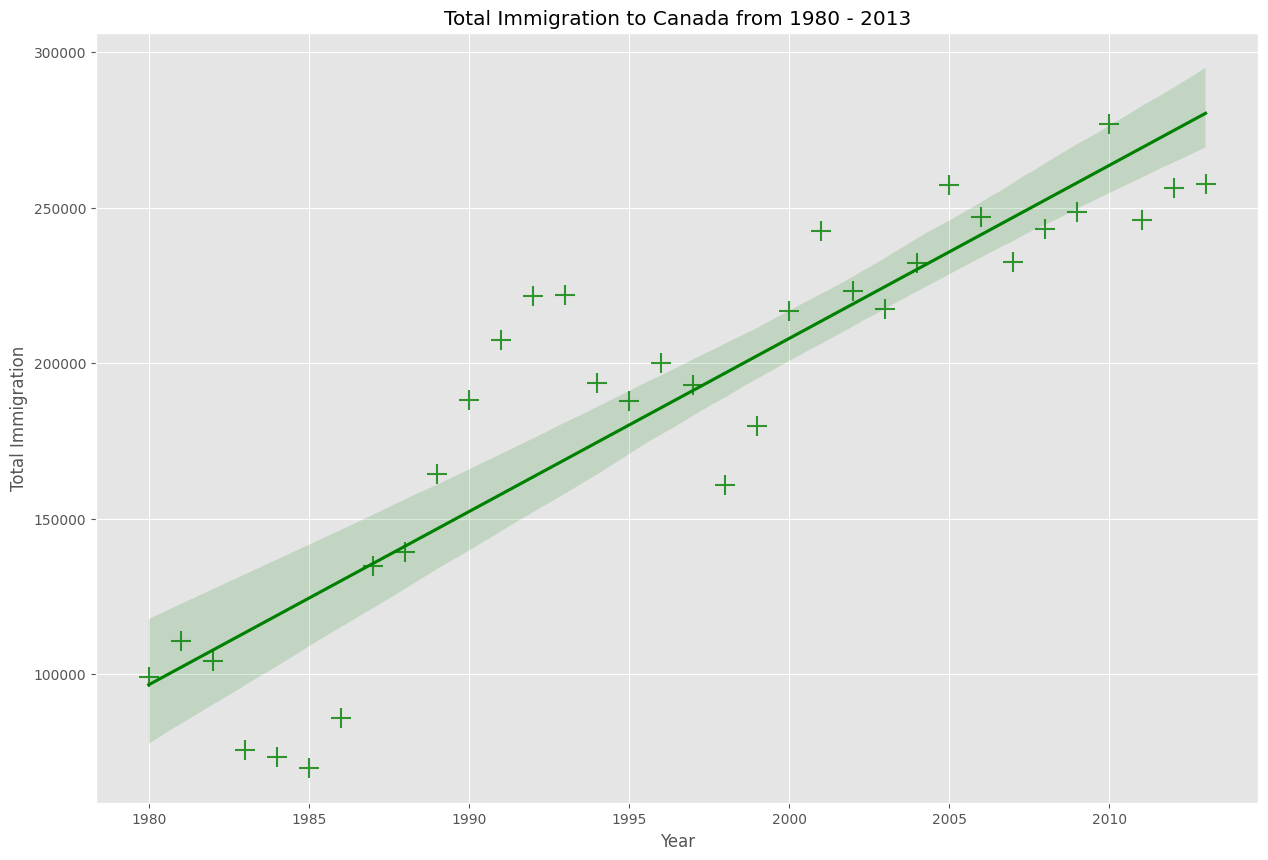

In [48]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

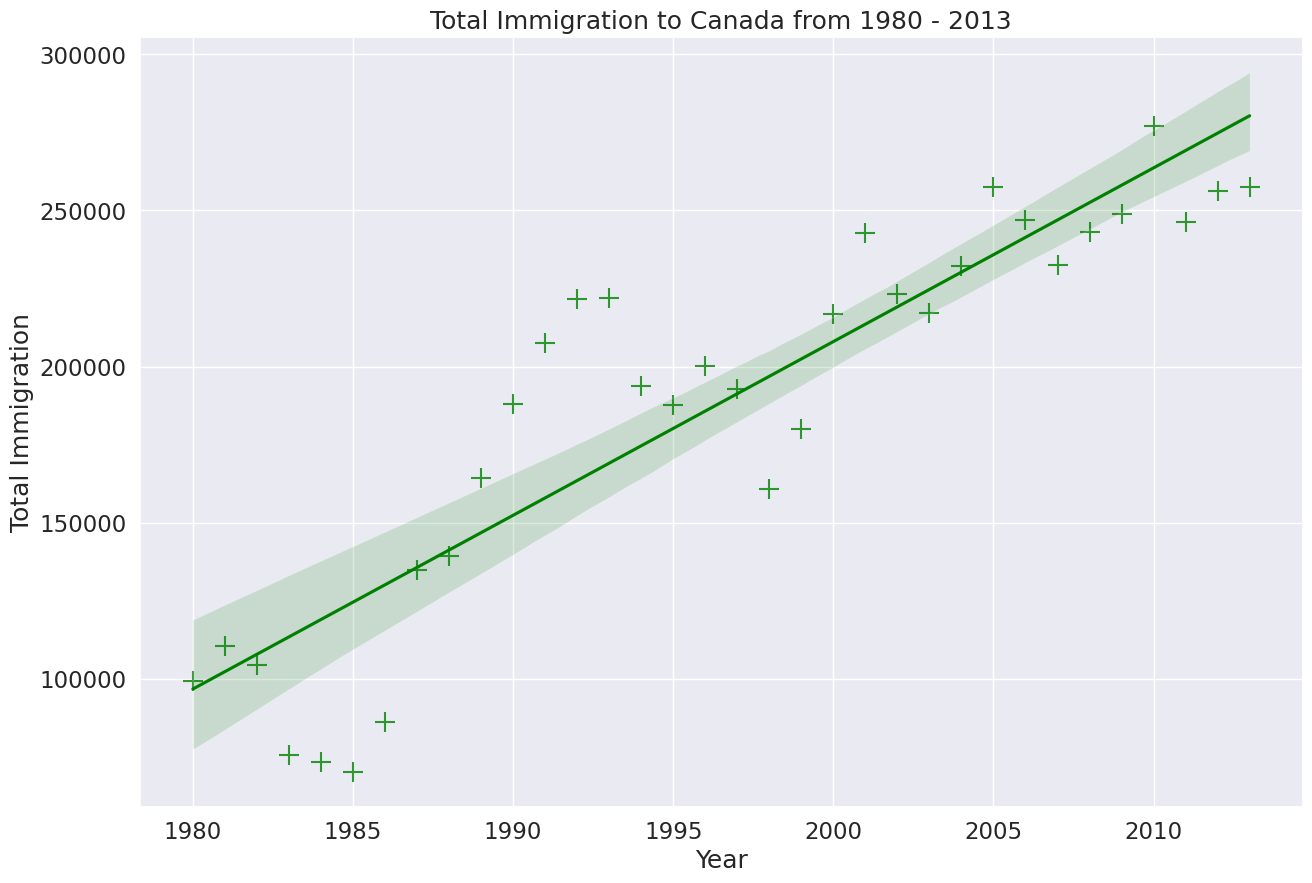

In [49]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

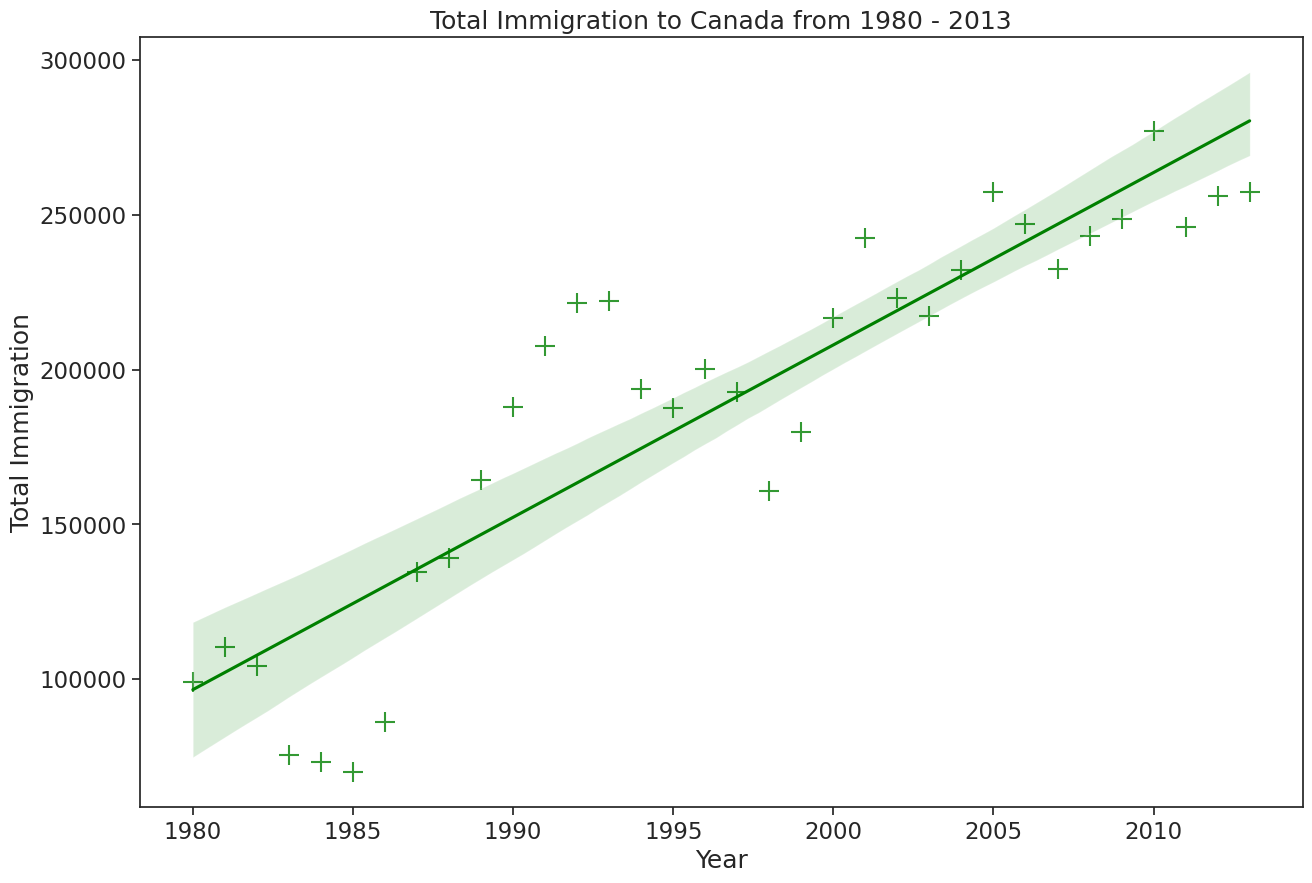

In [50]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

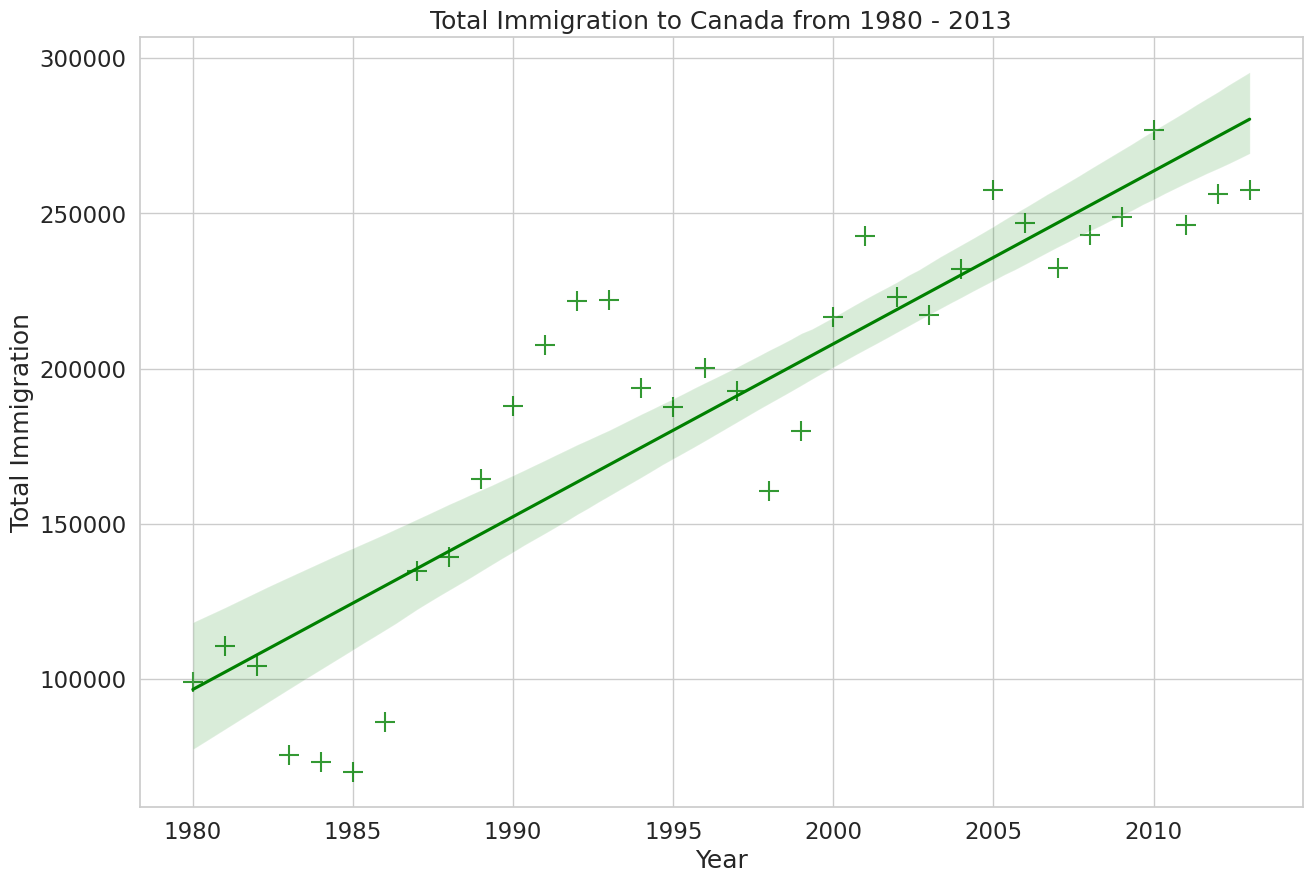

In [51]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden and Norway to Canada from1980 - 2013')

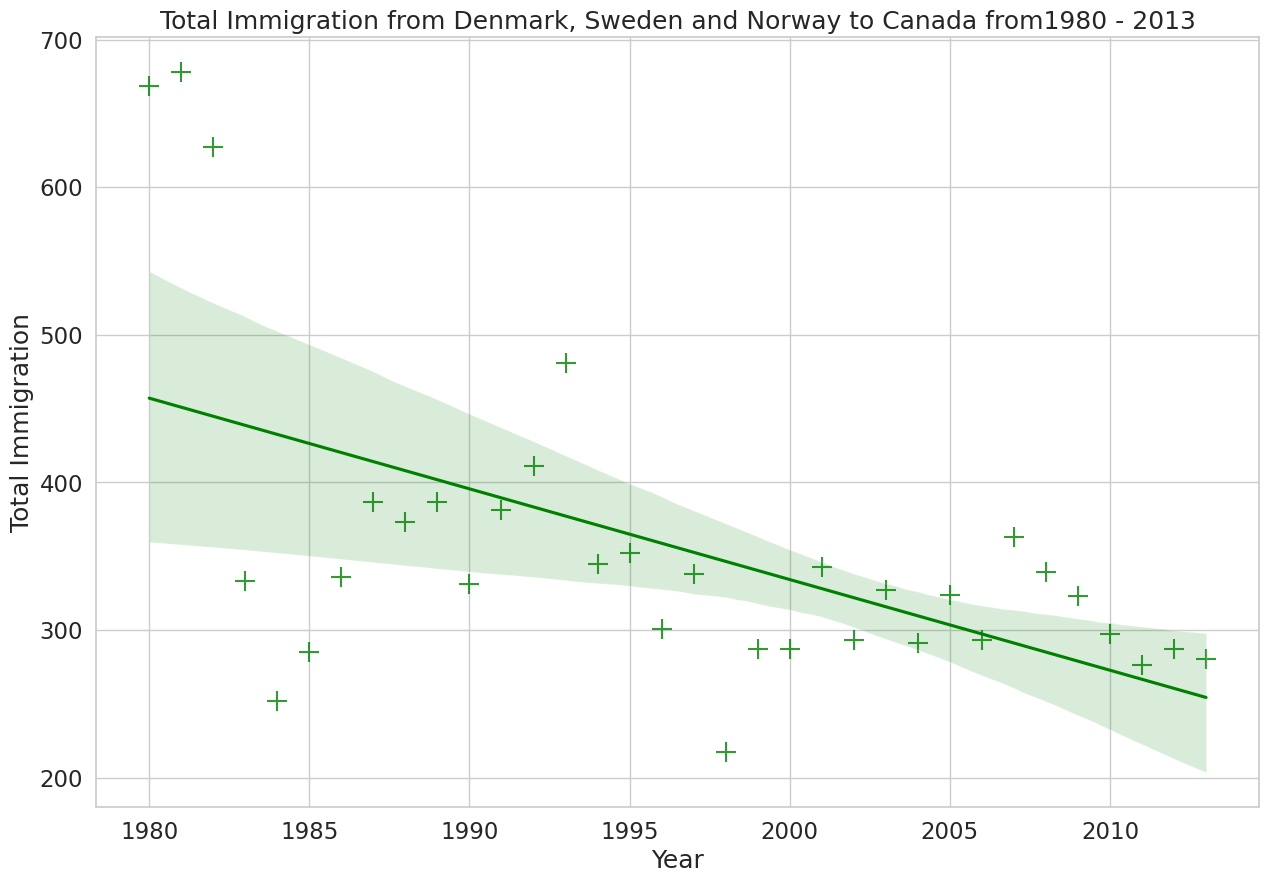

In [54]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden and Norway to Canada from1980 - 2013')